In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv2

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
# Import MINST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**OUR CODE**

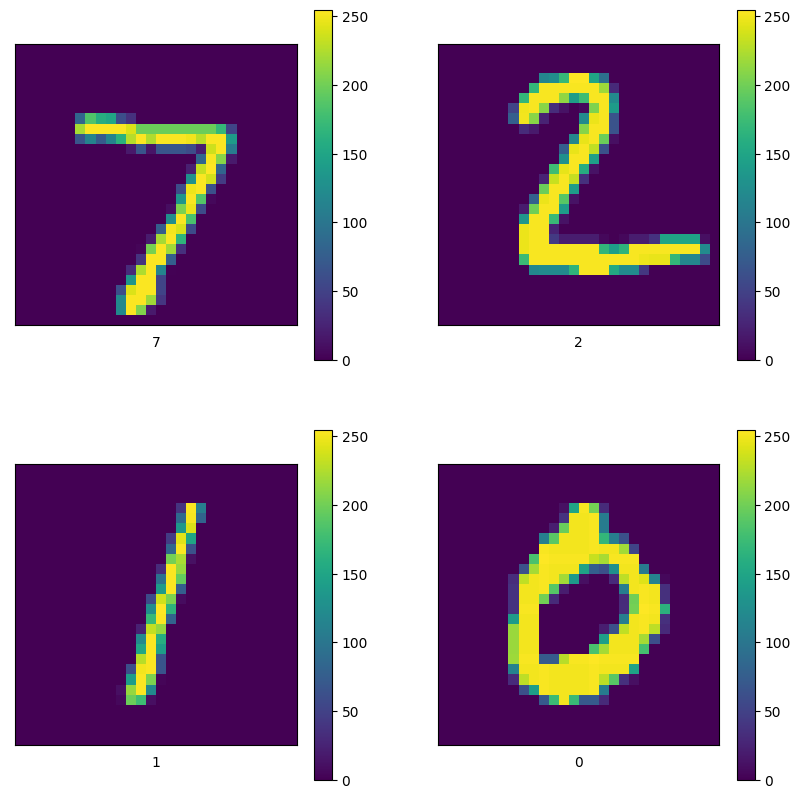

In [8]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(y_test[i])
    plt.colorbar()

In [9]:
# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

**OUR CODE**

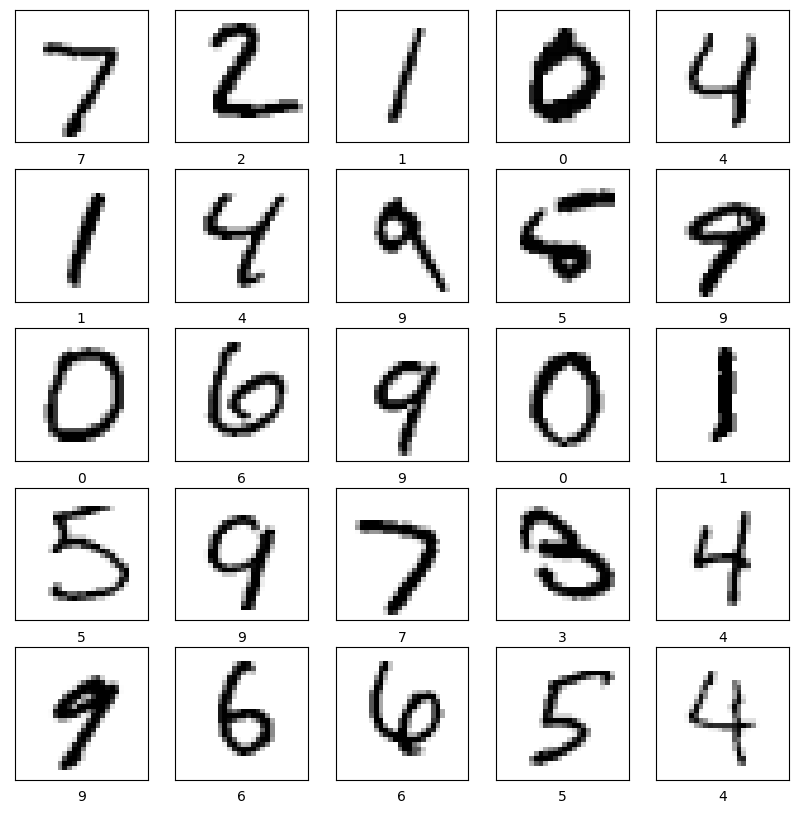

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])

In [20]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

In [11]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [12]:
# reshape MINST data
ds_train = x_train.reshape(x_train.shape[0], n_input)
ds_test = x_test.reshape(x_test.shape[0], n_input)
label_test=np.zeros(shape=(y_test.shape[0],n_classes),dtype="float32")
for k in range(y_test.shape[0]):
  label_test[k][y_test[k]]=1.0

In [13]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [14]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [15]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [17]:
# Launch the graph
def run(learning_rate, training_epochs, batch_size, display_step, ds_test, label_test):
   # Construct model
  pred = multilayer_perceptron(x, weights, biases)

  # Define loss and optimizer
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

  # Initializing the variables
  init = tf.global_variables_initializer()

  with tf.Session() as sess:
      sess.run(init)
      
      batch_xs=np.zeros(shape=(batch_size,784),dtype="float32")
      # Training cycle
      for epoch in range(training_epochs):
          avg_cost = 0.
          total_batch = int(ds_train.shape[0]/batch_size)
          # Loop over all batches
          for i in range(total_batch):
            batch_ys=np.zeros(shape=(batch_size,n_classes),dtype="float32")
            for k in range(batch_size):
              index = k+batch_size*i
              batch_xs[k] = ds_train[index] 
              batch_ys[k][y_train[index]]=1.0
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
          # Display logs per epoch step
          if epoch != 0 and epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
      #print("Optimization Finished!")

      # Test model
      correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
      # Calculate accuracy
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
      #print("Accuracy:", accuracy.eval({x: ds_test, y: label_test}))
      return accuracy.eval({x: ds_test, y: label_test})

In [29]:
def find_best():
  by_ = []
  max_v = 0
  max_lr = 0
  max_bs = 0
  max_te = 0
  r_learning_rate = np.arange(0.01, 0.1 + 0.05, 0.05)
  r_training_epochs = np.arange(5, 40, 5)
  r_batch_size = np.arange(100, 2000, 250)
  q = 0
  for i in r_learning_rate:
    for j in r_batch_size:
      for k in r_training_epochs:
        display_step = k + 5
        q = q + 1
        a = run(i, k, j, display_step, ds_test, label_test)
        print(q, ':: ', a , 'l_r: ', i, ' -- b_s: ', j, ' -- t_e: ', k)
        by_.append(a)
        if a > max_v:
          max_v = a
          max_lr = i
          max_bs = j
          max_te = k
  fig, ax = plt.subplots()
  ax.plot(range(q), by_)
  ax.title.set_text('Зависимость точности от параметров learning_rate, training_epochs и batch_size')
  ax.set_xlabel('Итерация (набор параметров learning_rate, training_epochs и batch_size))')
  ax.set_ylabel('Точность (accuracy)')
  plt.show()
  print('Лучшая точность: ', max_v, '. Lr:: ', max_lr, '. Bs:: ', max_bs, '. Te:: ', max_te)

1 ::  0.9543 l_r:  0.01  -- b_s:  100  -- t_e:  5
2 ::  0.9567 l_r:  0.01  -- b_s:  100  -- t_e:  10
3 ::  0.9623 l_r:  0.01  -- b_s:  100  -- t_e:  15
4 ::  0.9568 l_r:  0.01  -- b_s:  100  -- t_e:  20
5 ::  0.9572 l_r:  0.01  -- b_s:  100  -- t_e:  25
6 ::  0.963 l_r:  0.01  -- b_s:  100  -- t_e:  30
7 ::  0.954 l_r:  0.01  -- b_s:  100  -- t_e:  35
8 ::  0.94 l_r:  0.01  -- b_s:  350  -- t_e:  5
9 ::  0.9603 l_r:  0.01  -- b_s:  350  -- t_e:  10
10 ::  0.9582 l_r:  0.01  -- b_s:  350  -- t_e:  15
11 ::  0.9634 l_r:  0.01  -- b_s:  350  -- t_e:  20
12 ::  0.9655 l_r:  0.01  -- b_s:  350  -- t_e:  25
13 ::  0.9678 l_r:  0.01  -- b_s:  350  -- t_e:  30
14 ::  0.9662 l_r:  0.01  -- b_s:  350  -- t_e:  35
15 ::  0.9373 l_r:  0.01  -- b_s:  600  -- t_e:  5
16 ::  0.9419 l_r:  0.01  -- b_s:  600  -- t_e:  10
17 ::  0.9621 l_r:  0.01  -- b_s:  600  -- t_e:  15
18 ::  0.9602 l_r:  0.01  -- b_s:  600  -- t_e:  20
19 ::  0.9648 l_r:  0.01  -- b_s:  600  -- t_e:  25
20 ::  0.9625 l_r:  0.01  --

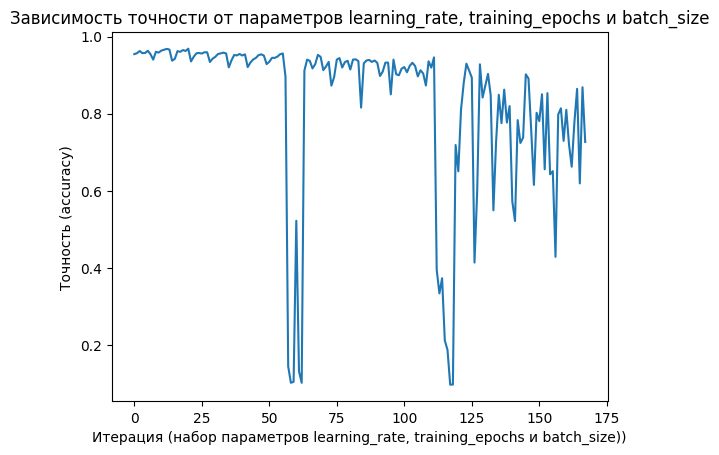

Лучшая точность:  0.9684 . Lr::  0.01 . Bs::  600 . Te::  35


In [30]:
#find_best()

In [27]:
learning_rate = 0.01
training_epochs = 35
batch_size = 600
display_step = 36

for q in range(0, 10):
    image = cv2.imread('n'+str(q)+'.png', cv2.IMREAD_GRAYSCALE)
    image = [*(image / 255.0).flatten()]
    image = [abs(x - 1) for x in image]
    label_test = [0] * 10
    label_test[q] = 1
    res = run(learning_rate, training_epochs, batch_size, display_step, [image], [label_test])
    print('Number ', 'n'+str(q), ' was understood: ', res)
    

Number  n0  was understood:  0.0
Number  n1  was understood:  1.0
Number  n2  was understood:  0.0
Number  n3  was understood:  0.0
Number  n4  was understood:  0.0
Number  n5  was understood:  1.0
Number  n6  was understood:  0.0
Number  n7  was understood:  0.0
Number  n8  was understood:  0.0
Number  n9  was understood:  0.0


In [28]:
learning_rate = 0.005
training_epochs = 4
batch_size = 512
display_step = 10

for q in range(0, 10):
    image = cv2.imread('n'+str(q)+'.png', cv2.IMREAD_GRAYSCALE)
    image = [*(image / 255.0).flatten()]
    image = [abs(x - 1) for x in image]
    label_test = [0] * 10
    label_test[q] = 1
    res = run(learning_rate, training_epochs, batch_size, display_step, [image], [label_test])
    print('Number ', 'n'+str(q), ' was understood: ', res)
    

Number  n0  was understood:  0.0
Number  n1  was understood:  0.0
Number  n2  was understood:  0.0
Number  n3  was understood:  0.0
Number  n4  was understood:  0.0
Number  n5  was understood:  1.0
Number  n6  was understood:  0.0
Number  n7  was understood:  0.0
Number  n8  was understood:  0.0
Number  n9  was understood:  0.0
